<a href="https://colab.research.google.com/github/toche7/StatPy/blob/main/Sample_Size_Using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sample Size

Taweesak Samanchuen <br>
Apr 27, 2023

การกำหนดหรือคำนวณหาค่า ​Sample Size จัดว่าเป็นปัญหาหนึ่งที่เกิดขึ้นบ่อยครั้งในการทำวิจัย ไม่ว่าจะเป็นทางด้านสังคมศาสตร์ หรืองานทางด้านวิทยาศาสตร์หรือวิศวกรรมศาสตร์ก็ตาม ในเอกสารนี้จะเป็นการอธิบายหลักการและที่มาของการคำนวณค่า Sample Size  ว่ามีหลักการอย่างไร ทั้งนี้การกำหนดค่านี้เอกสารนี้จะมุ่งเน้นไปในงานเชิงปริมาณเป็นหลัก สำหรับงานวิจัยเชิงคุณภาพการกำหนดขนาดของ Sample Size จะใช้ไ่ม่ใช้แนวคิดเชิงสถิติซึ่งจะนอกเหนือจากเอกสารนี้  

## Install Importand Libraries

In [ ]:
# install related library for Latex
!sudo apt install cm-super dvipng texlive-latex-extra texlive-latex-recommended

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  cm-super-minimal dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern
  fonts-noto-mono fonts-texgyre fonts-urw-base35 ghostscript javascript-common
  libapache-pom-java libcommons-logging-java libcommons-parent-java
  libfontbox-java libfontenc1 libgs9 libgs9-common libharfbuzz-icu0 libidn11
  libijs-0.35 libjbig2dec0 libjs-jquery libkpathsea6 libpdfbox-java
  libptexenc1 libruby2.7 libsynctex2 libteckit0 libtexlua53 libtexluajit2
  libwoff1 libzzip-0-13 lmodern pfb2t1c2pfb poppler-data preview-latex-style
  rake ruby ruby-minitest ruby-net-telnet ruby-power-assert ruby-test-unit
  ruby-xmlrpc ruby2.7 rubygems-integration t1utils tex-common tex-gyre
  texlive-base texlive-binaries texlive-fonts-recommended texlive-latex-base
  texlive-pictures texlive-plain-generic tipa xfonts-encodings xfonts-utils
Suggested packages:
  fonts-noto fon

In [ ]:
# Data calculation
import numpy as np
# Power analysis
from statsmodels.stats.power import  TTestIndPower 
# Visualization
import matplotlib.pyplot as plt
from scipy.stats import t, norm

# 1. Variance of Sample Mean


คุณสมบัติทางสถิติที่เกี่ยวของกับการคำนวณขนาดของ Sample Size คือค่ากระจาย โดยค่าการกระจายหรือ variance ของการทำ sampling จะมีขนาดลดลงตามขนาดของการ sampline size โดยสามารถเขียนเป็นสมการได้ดังนี้

\begin{equation}
\sigma_\bar{x} = \frac{\sigma}{\sqrt{n}} \tag{1}
\end{equation}

เราสามารถแสดงเป็นกราฟความสัมพันธ์ได้ดังนี้

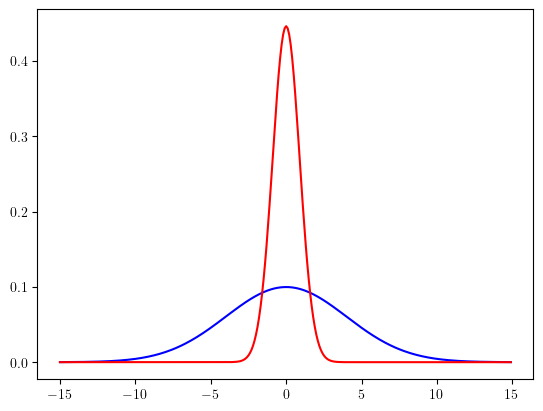

In [ ]:
x = np.arange(-15,15,0.1)
n = 20
s = 4
N0 = norm(0,s)
y0 = N0.pdf(x)
N1 = norm(0,s/np.sqrt(n))
ys = N1.pdf(x)
plt.rcParams['text.usetex'] = True
plt.rcParams["font.family"] = "Times New Roman"

plt.plot(x,y0,'b')
plt.plot(x,ys,'r')

จากความสัมพันธ์ข้างต้นเราสามารถ สร้างความสัมพันธ์ในรูปแบบอื่น ๆ ได้อีกคือ

* จำนวนของ sample การทำ normalize เพื่อให้ได้ variance ที่ต้องการ

\begin{equation}
n = \left(\frac{\sigma}{\sigma_\bar{x}}\right)^2 \tag{2}
\end{equation}

* หากต้องทำเป็น Standard Normal Distribution
\begin{equation}
n = \sigma^2 \tag{3}
\end{equation}

* ค่า Critical Value หรือ Theshold ที่จะตัดสินใจตามค่า $\alpha$ ที่กำหนด
$$
T = z_\alpha \sigma = z_\alpha \sqrt{n} \tag{4}
$$ 

z_a = 1.644854


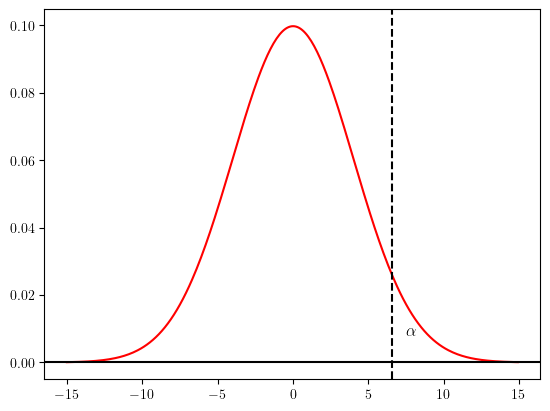

In [ ]:
#s = 1
alph = 0.05
Nz = norm(0,1)
z_a = Nz.ppf(1 - alph)
print('z_a = %f' %z_a)

N0 = norm(0,s)
y0 = N0.pdf(x)

plt.plot(x,y0,'r')
N0.cdf(z_a*s)
plt.axvline(x = z_a*s, color = 'k', linestyle='dashed', label = 'axvline - full height')
#plt.#adding text inside the plot
plt.text(7.5, 0.008, r'$\alpha $', fontsize = 12)
plt.axhline(y =0, color = 'k')
plt.show()


In [ ]:
N0.cdf(z_a*s)

0.95

# 2. Sample Size of Mean Estimation



### 2.1 One Sample
จากเรื่องของการทำ Interval Estimation (IE) จากค่า Sampling Mean [Ref XXX]

$$
\text{IE} =\bar{x} \pm \frac{z_\alpha\sigma}{\sqrt{n}} = \bar{x} \pm z_\alpha SE \tag{5}
$$ 

โดย SE คือค่า Standard Error มีค่าเท่ากับ
$$
SE = \frac{\sigma}{\sqrt{n}} \tag{6}
$$ 

ค่า margin of error ในการทำ IE นี้จะมีค่าเท่ากับ
$$
E = \frac{z_\alpha\sigma}{\sqrt{n}} \tag{7}
$$
เป้าหมายของเราคือ การทำให้แน่ใจว่าค่า margin of error (E) มันไม่มีค่าไม่เกินที่กำหนดไว้ โดยเราสามารถทำได้จากการปรับค่า $n$ นั้นคือเราจะได้ดังนี้  

\begin{equation}
n = \left( \frac{z_\alpha\sigma}{E} \right)^2 \tag{8}
\end{equation}

### Example 1:
An investigator wants to estimate the mean systolic blood pressure in children with congenital heart disease who are between the ages of 3 and 5. How many children should be enrolled in the study? The investigator plans on using a 95% confidence interval (so Z=1.96) and wants a margin of error of 5 units. The standard deviation of systolic blood pressure is unknown, but the investigators conduct a literature search and find that the standard deviation of systolic blood pressures in children with other cardiac defects is between 15 and 20. To estimate the sample size, we consider the larger standard deviation in order to obtain the most conservative (largest) sample size. 

CI = 95% => z = 1.96 <br>
E = 5<br>
SD = 15-20



In [ ]:
z_a = Nz.ppf(1 - alph/2)

In [ ]:
print(z_a)

1.959963984540054


In [ ]:
z = 1.96
E = 5
SD = 20 #select max
n = (z*SD/E)**2
print('number of sample = %d' % np.ceil(n))

number of sample = 62


### 2.2 Two Independent Population
ในกรณีที่เราต้องการตรวจสอบค่าความแตกต่างของค่า mean จากประชากรสองกลุ่มว่ามีความแตกต่างกันหรือไม่  เราสามารถคำนวณค่าประชากรที่ต้องการได้ดังนี้
\begin{equation}
n_i = 2\left( \frac{z_\alpha s_p}{E} \right)^2 \tag{9}
\end{equation}

เมื่อ $n_i$ มีค่าเป็น ​ Sample Size ของ $i \in \{1,2 \}$ และ $s_p$  เป็นค่า SD ร่วมของสองกลุ่มประชากร (pooled estimated of commond SD) ที่สามารคำนวณได้จาก

\begin{equation}
s_p = \sqrt{\frac{(n_1 -1)s_1^2 + (n_2 -1)s_2^2}{(n_1 + n_2 - 2)}} \tag{10}
\end{equation}

กรณีที่ $s_1 = s_2$ เราจะได้ว่า 
\begin{equation}
s_p =  s_1  \tag{11}
\end{equation}



### Example 2:
An investigator wants to plan a clinical trial to evaluate the efficacy of a new drug designed to increase HDL cholesterol (the "good" cholesterol). The plan is to enroll participants and to randomly assign them to receive either the new drug or a placebo. HDL cholesterol will be measured in each participant after 12 weeks on the assigned treatment. Based on prior experience with similar trials, the investigator expects that 10% of all participants will be lost to follow up or will drop out of the study over 12 weeks. A 95% confidence interval will be estimated to quantify the difference in mean HDL levels between patients taking the new drug as compared to placebo. The investigator would like the margin of error to be no more than 3 units. How many patients should be recruited into the study?

A major issue is determining the variability in the outcome of interest (σ), here the standard deviation of HDL cholesterol. To plan this study, we can use data from the Framingham Heart Study. In participants who attended the seventh examination of the Offspring Study and were not on treatment for high cholesterol, the standard deviation of HDL cholesterol is 17.1.

z = 1.96 <br>
E = 3 <br>
s = 17.1


In [ ]:
z = 1.96
E = 3
SD = 17.1 #select max
n = 2*(z*SD/E)**2
print('number of sample = %d' % np.ceil(n))

ในกรณีนี้จำเป็นจะต้องแยกทำการทดลองสองกลุ่ม โดยกลุ่มละ 250 คน ดังนั้นเราจะต้องเก็บข้อมูลทั้งหมด 500 คน โดยจะต้องเผื่อ margin ด้วยอีก 10% คิดเป็น 500/0.9 = 556 คน 

# 3. Sample Size for Hypothesis Testing

ก่อนอื่นต้องมาทบทวนเรื่องของการทดสอบสมมุติฐานกันก่อน สมมุติเราต้องการทดสอบสมมุติฐานว่า
$$
H_0 : \mu_0 = \mu_1
$$
$$
H_1 : \mu_0 \ne \mu_1 
$$
เราสามารถทำการวิเคราะห์ได้โดยแยกเป็นกรณีดังนี้



### กรณีที่ 1: $H_0$เป็นจริง 

โดยกำหนดให้ค่า  mean เป็น 90 เราจะสามารถแสดงเป็นสมการได้ดังนี้ 
$$
\mu_\bar{x} = \mu = 90
$$ 
โดยค่า Standard Deviation จะมีค่าเท่ากับ 
$$
SD = \sigma_\bar{x} = \frac{\sigma}{\sqrt{n}}
$$
หากกำหนดให้ $\sigma = 20$ และ $n = 100$
$$
SD = \frac{20}{\sqrt{100}} = 2.0
$$
เราสามารถแสดงเป็นกราฟได้ดังนี้


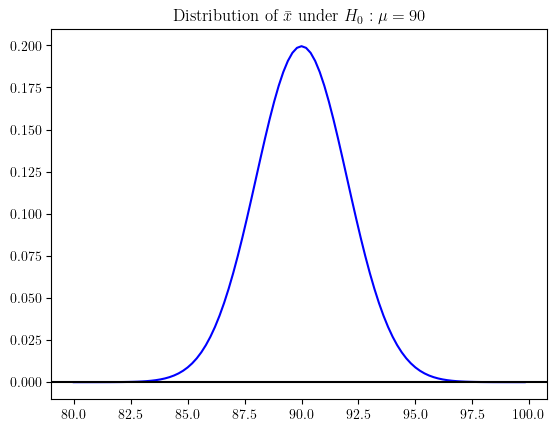

In [ ]:
mu = 90
n = 100
sd = 20
sdz = sd/np.sqrt(n)
N = norm(mu,sdz)
x = np.arange(80,100,0.2)
y = N.pdf(x)

plt.rcParams['text.usetex'] = True
plt.rcParams["font.family"] = "Times New Roman"

plt.plot(x,y,'b')
plt.title(r'Distribution of $\bar{x}$ under $H_0: \mu = 90$');
plt.axhline(y =0, color = 'k')
plt.show()



กำหนดความเชื่อมั่น ที่ 95% เราสามารถกำหนดได้ดังนี้

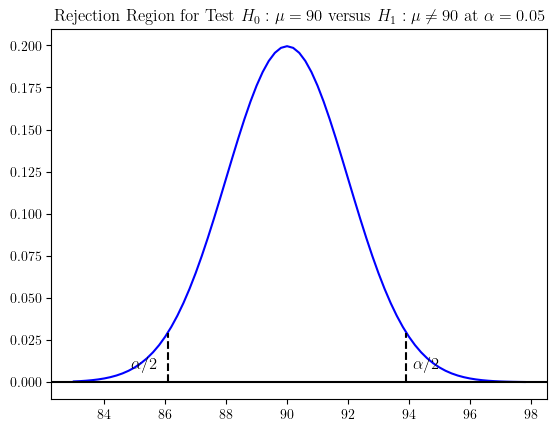

In [ ]:

x = np.arange(83,98,0.2)
y = N.pdf(x)
z_a = norm.ppf(.975)
Tu = mu + z_a*sdz
Tl = mu - z_a*sdz
plt.rcParams['text.usetex'] = True
plt.rcParams["font.family"] = "Times New Roman"

plt.plot(x,y,'b')
plt.title(r'Rejection Region for Test $H_0: \mu = 90$ versus $H_1: \mu \ne 90$ at $\alpha =0.05$');
plt.plot([Tu,Tu],[0,N.pdf(Tu)],linestyle='dashed',color = 'k')
plt.plot([Tl,Tl],[0,N.pdf(Tl)],linestyle='dashed',color = 'k')
plt.text(Tl - 1.2, 0.008, r'$\alpha/2 $', fontsize = 12)
plt.text(Tu + 0.2, 0.008, r'$\alpha/2 $', fontsize = 12)
plt.axhline(y =0, color = 'k')
plt.show()

โดยมีความหมายว่า ในช่วงความเชื่อมั่นตั้งแต่ Tl (86.71) ไปถึง Tu (93.29) จะมีพื้นที่ใต้กราฟอยู่ 0.95 ซึ่งจะหมายถึงความน่าจะเป็นที่จะมีค่า mean อยู่ในช่วงนี้ถึง 95% นั้นเอง พื้นที่ที่เกินตำแหน่ง critical value จะมีพื้นที่ 2 ส่วนด้วยกันโดยแต่ละส่วนจะมีขนาดพื้นที่เท่ากับ $\alpha/2$ ซึ่งในที่นี้จะมีค่าเท่ากับ 0.025

### กรณีที่ 2: $H_1$ เป็นจริง
แต่ถ้าหากเป็นกรณีที่ mean ของการทดสอบมีความแตกต่างกันเช่น 90 และ 94 จริงการกระจายก็จะเปลี่ยนไป เราสามารถแสดงการกระจายได้ดังนี้ เมื่อกำหนดค่าอื่นๆ ให้คงเดิม

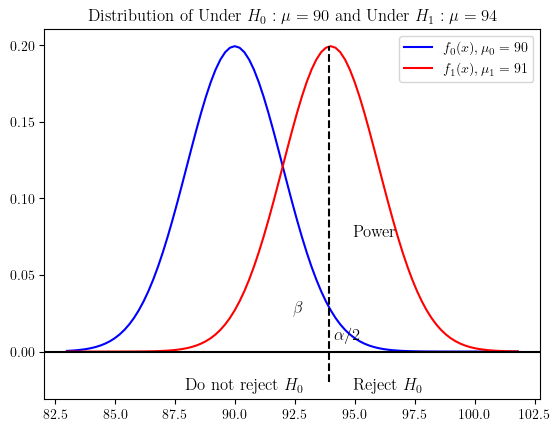

In [ ]:
mu0 = 90
mu1 = 94
n = 100
sd = 20
sdz = sd/np.sqrt(n)
N0 = norm(mu0,sdz)
N1 = norm(mu1,sdz)

x = np.arange(83,98 + 4,0.2)
y0 = N0.pdf(x)
y1 = N1.pdf(x)
z_a = norm.ppf(.975)
Tu = mu0 + z_a*sdz
Tl = mu0 - z_a*sdz
plt.rcParams['text.usetex'] = True
plt.rcParams["font.family"] = "Times New Roman"

plt.plot(x,y0,'b')
plt.plot(x,y1,'r')


plt.title(r'Distribution of Under $H_0: \mu = 90$ and Under $H_1: \mu = 94$');
plt.plot([Tu,Tu],[-0.02,N1.pdf(Tu)], linestyle='dashed', color = 'k')
#plt.axvline(x = Tu,  ymin=0, ymax = 0.5, color = 'k')
#plt.plot([Tl,Tl],[0,N1.pdf(Tl)],color = 'k')
plt.text(Tu + 0.2, 0.008, r'$\alpha/2 $', fontsize = 12)
plt.text(Tu - 1.5, 0.025, r'$\beta$', fontsize = 12)
plt.text(Tu + 1, 0.075, r'Power', fontsize = 12)
plt.text(Tu + 1, -0.025, r'Reject $H_0$', fontsize = 12)
plt.text(Tu - 6, -0.025, r'Do not reject $H_0$', fontsize = 12)
plt.axhline(y =0, color = 'k')
plt.legend(['$f_0(x),\mu_0 = 90$', '$f_1(x), \mu_1 = 91$'])
plt.show()

จากรูปจะเห็นว่ากราฟประกอบไปด้วยกราฟสองเส้นคือ $f_0(x)$ และ $f_1(x)$ โดยจะเป็นฟังก์ชันการกระจายที่มีค่ากลางอยู่ที่ $\mu_0$ และ $\mu_1$ ตามลำดับ 

หากเรายังกำหนดให้ความเชื่อมันของการทดสอบ $H_0$ ยังคงเป็น 0.95 อยู่  เราจะยังคงได้แนว critical value หรือแนวของการัดสินใจอยู่ที่ตำแหน่ง Tu เช่นเดียวกับก่อนหน้านี้ นั้นคือค่า $\alpha/2$ ยังคงเท่าเดิมที่ 0.025 เราจะต้องใช้เป็น Two-Tailed Test สำหรับ $H_0$ เนื่องจากจะเป็นค่าตั้งต้นในการศึกษา โดยที่การซุ่มค่าข้อมูลมาทดสอบนี้ก็จะหนดความมีความเชื่อมันว่าจะเกิดในบริเวณที่เชื่อมั่นนี้ 0.95 ตามที่ได้อธิบายไปก่อนหน้านี้ 

การตัดสินใจปฏิเสธ $H_0$ จะเป็นการตัดสินใจที่ผิดเมื่อ $H_0$ เป็นจริง แต่จะเป็นการตัดสินใจที่ถูกเมื่อ $H_1$ เป็นจริงถูกเรียกว่า Power หรือ Detection Probability นั้นเอง โดยสามารถคำนวณได้จากพื้นที่ใต้กราฟได้ดังนี้


In [ ]:
p = 1 - N1.cdf(Tu)
print('Power = %0.2f' %p)

Power = 0.52


In [ ]:
beta = N1.cdf(Tu)
print('Beta = %0.2f' %beta)

Beta = 0.48


ปัจจัยที่จะทำให้ค่า power นี้มีค่ามากน้อยแค่ไหนมี 2 ปัจจัยด้วยกันคือค่า critical value ที่เราใช้ในการตัดสินใจ 

ส่วนอีกกรณีอีกค่าหนึ่งก็คือระยะห่างของการกระจายของ $f_0(x)$ และ $f_1(x)$ อย่างเช่นตัวอย่างด้านล่างนี้เราจะทำให้การกระจายของ $f_0(x)$ และ $f_1(x)$ ห่างขึ้นโดยการเปลี่ยนค่า $\mu_1$ ไปเป็น 98 

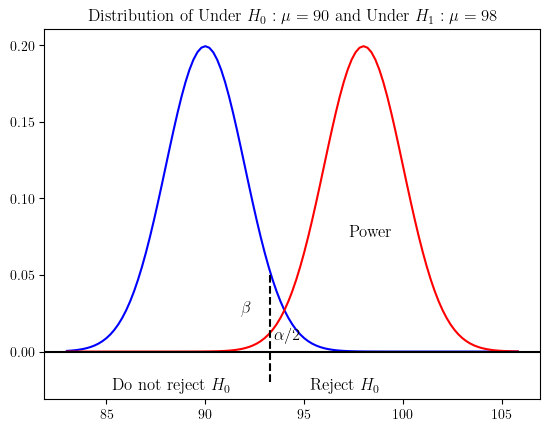

In [ ]:
mu0 = 90
mu1 = 98
n = 100
sd = 20
sdz = sd/np.sqrt(n)
N0 = norm(mu0,sdz)
N1 = norm(mu1,sdz)

x = np.arange(83,98 + 8,0.2)
y0 = N0.pdf(x)
y1 = N1.pdf(x)
z_a = norm.ppf(.95)
Tu = mu0 + z_a*sdz
Tl = mu0 - z_a*sdz
plt.rcParams['text.usetex'] = True
plt.rcParams["font.family"] = "Times New Roman"

plt.plot(x,y0,'b')
plt.plot(x,y1,'r')


plt.title(r'Distribution of Under $H_0: \mu = 90$ and Under $H_1: \mu = 98$');
plt.plot([Tu,Tu],[-0.02,N0.pdf(Tu)], linestyle='dashed', color = 'k')
#plt.axvline(x = Tu,  ymin=0, ymax = 0.5, color = 'k')
#plt.plot([Tl,Tl],[0,N1.pdf(Tl)],color = 'k')
plt.text(Tu + 0.2, 0.008, r'$\alpha/2 $', fontsize = 12)
plt.text(Tu - 1.5, 0.025, r'$\beta$', fontsize = 12)
plt.text(Tu + 4, 0.075, r'Power', fontsize = 12)
plt.text(Tu + 2, -0.025, r'Reject $H_0$', fontsize = 12)
plt.text(Tu - 8, -0.025, r'Do not reject $H_0$', fontsize = 12)
plt.axhline(y =0, color = 'k')

plt.show()

In [ ]:
p = 1 - N1.cdf(Tu)
print('Power = %0.2f' %p)

Power = 0.99


### Estimating Sample Size for Hypothesis Testing of One Independent Population

ดังนั้นจากก่อนหน้านี้ เราสามารถประมาณค่า Sample Size ในกรณีของการทำ Hypothesis Test ได้ดังนี้

\begin{equation}
n = \left( \frac{z_{1-\alpha/2} + z_{1-\beta}} {ES} \right)^2 \tag{12}
\end{equation}

$ES$ = Effect Size 
\begin{equation}
ES = \frac{|\mu_1 - \mu_0|}{\sigma} \tag{13}
\end{equation}

In [ ]:
z_1a = norm.ppf(0.975)
z_1b = norm.ppf(0.8)
print('z_1a = %f, z_1a = %f' %(z_1a, z_1b))

ES = np.abs(mu0 - mu1)/sd

n = ((z_1a + z_1b)/ES)**2
print('Sample Size = %f' %n)

z_1a = 1.959964, z_1a = 0.841621
Sample Size = 49.055498


### Estimating Sample Size for Hypothesis Testing of Two Independent Population

ดังนั้นจากก่อนหน้านี้ เราสามารถประมาณค่า Sample Size ในกรณีของการทำ Hypothesis Test ได้ดังนี้

\begin{equation}
n = 2\left( \frac{z_{1-\alpha/2} + z_{1-\beta}} {ES} \right)^2 \tag{14}
\end{equation}

$ES$ = Effect Size 
\begin{equation}
ES = \frac{|\mu_1 - \mu_0|}{\sigma} \tag{15}
\end{equation}

In [ ]:
z_1a = norm.ppf(1-0.05/2)
z_1b = norm.ppf(0.8)
print('z_1a = %f, z_1a = %f' %(z_1a, z_1b))
ES = 0.2

n = 2*((z_1a + z_1b)/ES)**2
print('Sample Size = %f' %n)

z_1a = 1.959964, z_1a = 0.841621
Sample Size = 392.443987


# 4.Power Analysis with Python


เนื่องจาก Python ได้มีการเตรียมไลบรารี่ที่สามารถทำให้เราคำนวณในเรื่องของ Power Analysis ไว้ซึ่งค่อนข้างที่จะสะดวกเป็นอย่างมากในการศึกษาเรื่องนี้  ทั้งนี้เราจะเอาความรู้ที่ได้มาจาก่อนหน้านี้มาดำเนินการด้วยไลบรารี่นี้ 

## Step 0: ตัวแปรที่เกี่ยวข้อง

Power Analysis นี้ปกติจะใช้เพื่อวิเคราะห์หาจำนวนของ sample size ในการทดสอบ Hypothesis Test โดยจะประกอบด้วย 4 ตัวแปรด้วยกันคือ $\alpha$, Effect Size, Statistical Power และ Sample Size โดยมีรายละเอียดดังนี้

1. $\alpha$ หรือค่า error type I คือค่าความน่าจะเป็นที่ reject $H_0$  เมื่อ $H_{0}$ เป็นจริง (False Alarm Probability $P_{fa}$)
2. Statistical Power คือค่าความน่าจะเป็นในการ Detection $H_1$ หรือ ได้อย่างถูกต้อง (Detection Proability, $P_d$)
3. Effect size คือค่าระยะห่างระหว่าง ค่า magnitude ของ distribution ที่ทำการทดสอบ Cohen ได้กำหนดค่า Effect Size ไว้ที่ 3 ระดับด้วยกันคือ 0.2, 0.5 และ 0.8
4. $n$ คือ sample size





## Step 1: Import Libraries

สำหรับไลบรารี่ที่ใช้ในการดำเนินการเรื่องนี้คือ statsmodels โดยเราจะทำการ import เอา TTestIndPower มาใช้ในการวิเคราะห์เรื่องนี้ 


In [ ]:
# Data calculation
import numpy as np

# Power analysis
from statsmodels.stats.power import  TTestIndPower 

# Visualization
import matplotlib.pyplot as plt

## Step 2: Calculate Sample Size

ถัดมาเราจะทำการทดลองหาขนาดของ Sample Size โดยใช้กำหนดค่าที่ใช้ในการคำนวณเป็นดังนี้
* $\alpha = 0.05$
* Power = 0.8
* ES = 0.2

และในการทดสอบนี้เป็นการทดสอบแบบ two-sided hypothesis testing นั้นคือ alternative = 'two-sided'

สำหรับ method ที่เราจะใช้คือ solve_power โดย method นี้จะรับค่า ตัวแปรที่เกี่ยวข้อ 4 ตัวคือ effect_size, nobs1, alpha, power โดยมันจะคืนค่ากลับมาให้กับตัวที่ไม่ได้ระบุค่า ดังนั้นในกรณีเราจะละ nobs1 ซึ่งจะเป็นตัวที่กำหนดค่า sample size

In [ ]:
# Initiate the power analysis
power_analysis = TTestIndPower()
# Calculate sample size
sample_size = power_analysis.solve_power(effect_size = 0.2, alpha = 0.05, power = 0.8, alternative = 'two-sided', ratio = 1);
# Print results
print('The sample size needed for each group is', round(sample_size))

The sample size needed for each group is 393


จะเห็นว่าค่าที่ได้มีค่าตรงกับการคำนวณที่ได้แสดงรายละเอียดก่อนมาก่อนหน้านี้

## Step 3: Calculate Power

ในขั้นตอนนี้เราจะคำนวณ Power โดยใช้ ข้อมูลก่อนหน้านี้ โดยใช้ฟังก์ชัน power ดังตัวอย่างข้างล่าง นอกจากนั้นเรายังสามารถใช้ solve_power ได้เช่นกัน 

In [ ]:
# Initiate the power analysis
power_analysis = TTestIndPower()

# Calculate power
power = power_analysis.power(effect_size = 0.2, alpha = 0.05, nobs1 = 393, ratio = 1, alternative = 'two-sided')

# Print results
print('The power for the hypothesis testing is', round(power, 2))

The power for the hypothesis testing is 0.8


จะเห็นว่าเราได้ 0.8 เท่ากับที่ได้กำหนดไว้ตอนคำนวณการหาขนาด Sample Size

## Step 4: Calculate Effect Size

ในการคำนวณค่า Effect Size มีหลายวิธีด้วยกัน โดยวิธีที่นิยมกันมากคือการใช้ค่า d ของ Cohen โดยในเราจะสามารถคำนวณได้ด้วยการคำนวณค่า pooled SD 

\begin{equation}
s_p = \sqrt{\frac{(n_1 -1)s_1^2 + (n_2 -1)s_2^2}{(n_1 + n_2 - 2)}} 
\end{equation}

และไปเป็นตัวหารความแตกต่างของค่า mean ดังสมการ

\begin{equation}
ES = \frac{|\mu_1 - \mu_0|}{s_p} \tag{16}
\end{equation}


In [ ]:
# Input parameters
mu1 = 2.1 # Group 1 average value
mu2 = 1.9 # Group 2 average value
s1 = 0.6 # Group 1 standard deviation
s2 = 0.5 # Group 2 standard deviation
n1 = 400 # Group 1 sample size
n2 = 400 # Group 2 sample size

# Calculate the pooled standard deviation
s = np.sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))

# Calculate the Cohen's d effect size
d = (mu1 - mu2) / s

# Print results
print('The effect size for the hypothesis testing is', round(d, 2))

## Step 5: Calculate Significance Level

การคำนวณ Significane Level หรือค่า alpha ก็สามารถทำได้ด้วยฟังก์ชัน solve_power เช่นกันดังนี้

In [ ]:
# Initiate the power analysis
power_analysis = TTestIndPower()

# Calculate power
alpha = power_analysis.solve_power(effect_size = 0.2, power = 0.8, nobs1 = 393, ratio = 1, alternative = 'two-sided')

# Print results
print('The significance level for the hypothesis testing is', round(alpha, 2))

The significance level for the hypothesis testing is 0.05


## Step 6: Sample Size Vs Statistical Power

ในส่วนนี้เราจะแสดงให้เห็นถึงความสัมพันธ์ของขนาด sample ที่ส่งผลต่อการค่า Power

เราสามารถทดสอบเรื่องนี้ด้วยการใช้ฟังก์ชันที่ได้มีการเตรียมไว้แล้วในไลบรารี่นี้ ทำให้เขียนโปรแกรมทดสอบได้ง่ายดังมีแปรตัวที่เกี่ยวข้องดังนี้  

* `dep_var` specifies the measure for the x-axis. 
 `dep_var='nobs'` means that we are using sample size as x-axis and power as the y axis. 

* `nobs` is the value of sample size. We used the value of 5 to 800 to plot the graph.

* `effect_size` is the effect size value for the power analysis. We used the widely used Cohen's d value for small, medium, and large effect sizes. Each  `effect_size` has one curve on the graph.

* `alpha` is the significance level. We used 0.05 for this plot.

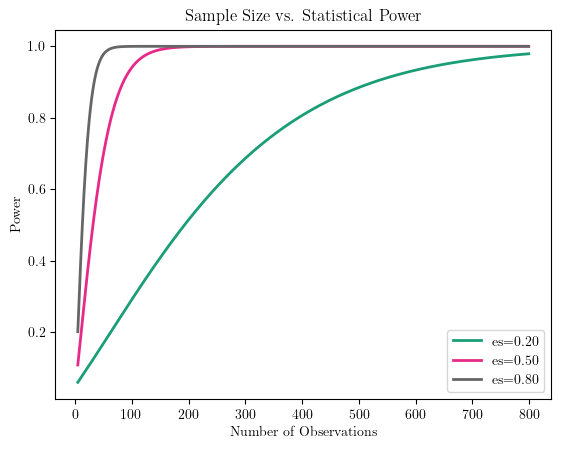

In [ ]:
# Initiate the power analysis
power_analysis = TTestIndPower()

# Visualization
power_analysis.plot_power(dep_var='nobs',
                          nobs=np.arange(5, 800),
                          effect_size=np.array([0.2, 0.5, 0.8]),
                          alpha=0.05,
                          title='Sample Size vs. Statistical Power')
plt.ylabel('Power')
plt.show()

From the graph, we can see that 
* Statistical power increases with the sample size. 
* To achieve the same statistical power, we need more samples to detect a smaller effect size.

## Step 7: Effect Size Vs Statistical Power

In step 7, we will examine how statistical power changes with effect size.

The `'effect_size'` is used as x-axis. We plot the curves for three sample sizes, 50, 100, and 500. 

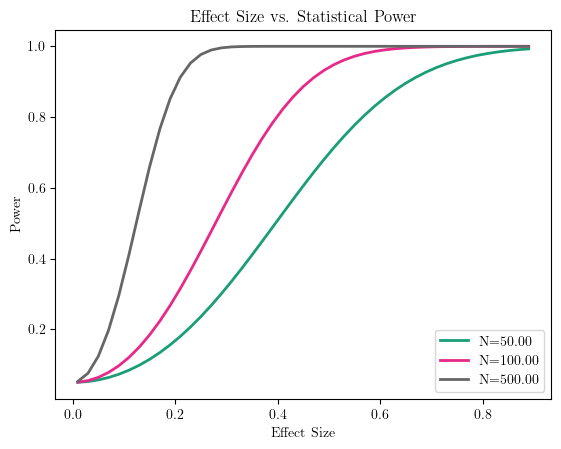

In [ ]:
# Initiate the power analysis
power_analysis = TTestIndPower()

# Visualization
power_analysis.plot_power(dep_var='effect_size',
                          nobs=np.array([50, 100, 500]),
                          effect_size=np.arange(0.01, 0.9, 0.02),
                          alpha=0.05,
                          title='Effect Size vs. Statistical Power')
plt.ylabel('Power')
plt.show()

โดยจากกราฟเราจะเห็นว่า 
* Power เพิ่มเมื่อค่า effect size เพิ่ม
* เมื่อ effect size มีค่าต่ำ จะต้องการ sample size ที่มีขนาดใหญ่ขึ้นเพื่อจะให้ได้ค่า power ที่ดี  


# สรุป

ในเอกสารนี้ เราได้เห็นผลการวิเคราะห์ค่า Power Analysis สำหรับการทดสอบ Hypothesis Test โดยเราเห็นตั้งแต่ที่มาของ ทฤษฏีต่างๆ ที่เกี่ยวของกับการวิเคราะห์เรื่องนี้ ซึ่งจะเกี่ยวข้องโดยตรงกับการวิเคราะห์ขนาด sample size และเราสามารถใช้ library ทางด้านสติถิมาช่วยในการวิเคราะห์ให้รวดเร็วยิ่งขึ้นได้ 

## Credit

1. ศึกษาทฤษฏีที่เกี่ยวข้องได้ที่ https://sphweb.bumc.bu.edu/otlt/mph-modules/bs/bs704_power/bs704_power_print.html
2. เอกสารนี้พัฒนาต่อมาจาก https://pub.towardsai.net/power-analysis-for-sample-size-using-python-33da7d5f570d
3. เวบสติถิทางแพทย์ https://sphweb.bumc.bu.edu/otlt/MPH-Modules/Menu/


## Recommended Tutorials

- [GrabNGoInfo Machine Learning Tutorials Inventory](https://medium.com/grabngoinfo/grabngoinfo-machine-learning-tutorials-inventory-9b9d78ebdd67)
- [Hierarchical Topic Model for Airbnb Reviews](https://medium.com/p/hierarchical-topic-model-for-airbnb-reviews-f772eaa30434)
- [3 Ways for Multiple Time Series Forecasting Using Prophet in Python](https://medium.com/p/3-ways-for-multiple-time-series-forecasting-using-prophet-in-python-7a0709a117f9)
- [Time Series Anomaly Detection Using Prophet in Python](https://medium.com/grabngoinfo/time-series-anomaly-detection-using-prophet-in-python-877d2b7b14b4)
- [Time Series Causal Impact Analysis in Python](https://medium.com/grabngoinfo/time-series-causal-impact-analysis-in-python-63eacb1df5cc)
- [Hyperparameter Tuning For XGBoost](https://medium.com/p/hyperparameter-tuning-for-xgboost-91449869c57e)
- [Four Oversampling And Under-Sampling Methods For Imbalanced Classification Using Python](https://medium.com/p/four-oversampling-and-under-sampling-methods-for-imbalanced-classification-using-python-7304aedf9037)
- [Five Ways To Create Tables In Databricks](https://medium.com/grabngoinfo/five-ways-to-create-tables-in-databricks-cd3847cfc3aa)
- [Explainable S-Learner Uplift Model Using Python Package CausalML](https://medium.com/grabngoinfo/explainable-s-learner-uplift-model-using-python-package-causalml-a3c2bed3497c)
- [One-Class SVM For Anomaly Detection](https://medium.com/p/one-class-svm-for-anomaly-detection-6c97fdd6d8af)
- [Recommendation System: Item-Based Collaborative Filtering](https://medium.com/grabngoinfo/recommendation-system-item-based-collaborative-filtering-f5078504996a)
- [Hyperparameter Tuning for Time Series Causal Impact Analysis in Python](https://medium.com/grabngoinfo/hyperparameter-tuning-for-time-series-causal-impact-analysis-in-python-c8f7246c4d22)
- [Hyperparameter Tuning and Regularization for Time Series Model Using Prophet in Python](https://medium.com/grabngoinfo/hyperparameter-tuning-and-regularization-for-time-series-model-using-prophet-in-python-9791370a07dc)
- [Multivariate Time Series Forecasting with Seasonality and Holiday Effect Using Prophet in Python](https://medium.com/p/multivariate-time-series-forecasting-with-seasonality-and-holiday-effect-using-prophet-in-python-d5d4150eeb57)
- [LASSO (L1) Vs Ridge (L2) Vs Elastic Net Regularization For Classification Model](https://medium.com/towards-artificial-intelligence/lasso-l1-vs-ridge-l2-vs-elastic-net-regularization-for-classification-model-409c3d86f6e9)
- [S Learner Uplift Model for Individual Treatment Effect and Customer Segmentation in Python](https://medium.com/grabngoinfo/s-learner-uplift-model-for-individual-treatment-effect-and-customer-segmentation-in-python-9d410746e122)
- [How to Use R with Google Colab Notebook](https://medium.com/p/how-to-use-r-with-google-colab-notebook-610c3a2f0eab)

## References

* [statsmodels documentation on power analysis](https://www.statsmodels.org/dev/generated/statsmodels.stats.power.TTestIndPower.html)